<a href="https://www.kaggle.com/code/testanother/tensorflow-submission?scriptVersionId=121889644" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s3e10/sample_submission.csv
/kaggle/input/playground-series-s3e10/train.csv
/kaggle/input/playground-series-s3e10/test.csv


In [2]:
df_train = pd.read_csv('/kaggle/input/playground-series-s3e10/train.csv')
df_test = pd.read_csv('/kaggle/input/playground-series-s3e10/test.csv')

In [3]:
df_train.describe()

,id,Mean_Integrated,SD,EK,Skewness,Mean_DMSNR_Curve,SD_DMSNR_Curve,EK_DMSNR_Curve,Skewness_DMSNR_Curve,Class
count,117564.000000,117564.000000,117564.000000,117564.000000,117564.000000,117564.000000,117564.000000,117564.000000,117564.000000,117564.000000
mean,58781.500000,111.248300,46.713535,0.503498,1.886385,11.962921,26.190678,8.037488,93.881076,0.093285
std,33937.947861,24.906474,6.102941,1.127093,6.515466,26.719946,20.041937,3.840980,79.962110,0.290833
min,0.000000,6.054688,24.783273,-1.730782,-1.791886,0.213211,7.370432,-2.597872,-1.976976,0.000000
25%,29390.750000,104.546875,43.443390,0.049761,-0.188956,2.090301,14.955405,6.742911,49.409136,0.000000
50%,58781.500000,116.664062,47.478932,0.186498,0.091720,2.808528,18.164924,8.442883,83.421375,0.000000
75%,88172.250000,126.296875,50.862718,0.395620,0.691613,4.122910,24.732218,10.003237,122.093290,0.000000
max,117563.000000,189.367188,93.602933,7.879628,65.385974,217.371238,109.890785,34.539844,1191.000837,1.000000


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117564 entries, 0 to 117563
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    117564 non-null  int64  
 1   Mean_Integrated       117564 non-null  float64
 2   SD                    117564 non-null  float64
 3   EK                    117564 non-null  float64
 4   Skewness              117564 non-null  float64
 5   Mean_DMSNR_Curve      117564 non-null  float64
 6   SD_DMSNR_Curve        117564 non-null  float64
 7   EK_DMSNR_Curve        117564 non-null  float64
 8   Skewness_DMSNR_Curve  117564 non-null  float64
 9   Class                 117564 non-null  int64  
dtypes: float64(8), int64(2)
memory usage: 9.0 MB


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
#g = sns.PairGrid(df_train)
#g.map_upper(sns.scatterplot)
#g.map_lower(sns.kdeplot)
#g.map_diag(sns.kdeplot, lw=3, legend=False)
#sns.histplot(df_train, x='Skewness')

In [7]:
cors = df_train.corr()
cors

,id,Mean_Integrated,SD,EK,Skewness,Mean_DMSNR_Curve,SD_DMSNR_Curve,EK_DMSNR_Curve,Skewness_DMSNR_Curve,Class
id,1.000000,-0.005033,-0.004454,0.004261,0.002811,0.000798,0.001832,-0.002011,-0.001365,0.004162
Mean_Integrated,-0.005033,1.000000,0.668963,-0.907069,-0.820126,-0.369127,-0.419881,0.366709,0.244710,-0.788776
SD,-0.004454,0.668963,1.000000,-0.636263,-0.632096,-0.147816,-0.196032,0.172620,0.117391,-0.523804
EK,0.004261,-0.907069,-0.636263,1.000000,0.966847,0.449020,0.504625,-0.445322,-0.299952,0.864005
Skewness,0.002811,-0.820126,-0.632096,0.966847,1.000000,0.440559,0.479277,-0.423670,-0.283711,0.793914
Mean_DMSNR_Curve,0.000798,-0.369127,-0.147816,0.449020,0.440559,1.000000,0.865737,-0.700036,-0.429520,0.443356
SD_DMSNR_Curve,0.001832,-0.419881,-0.196032,0.504625,0.479277,0.865737,1.000000,-0.852098,-0.611256,0.547594
EK_DMSNR_Curve,-0.002011,0.366709,0.172620,-0.445322,-0.423670,-0.700036,-0.852098,1.000000,0.917314,-0.490247
Skewness_DMSNR_Curve,-0.001365,0.244710,0.117391,-0.299952,-0.283711,-0.429520,-0.611256,0.917314,1.000000,-0.341070
Class,0.004162,-0.788776,-0.523804,0.864005,0.793914,0.443356,0.547594,-0.490247,-0.341070,1.000000


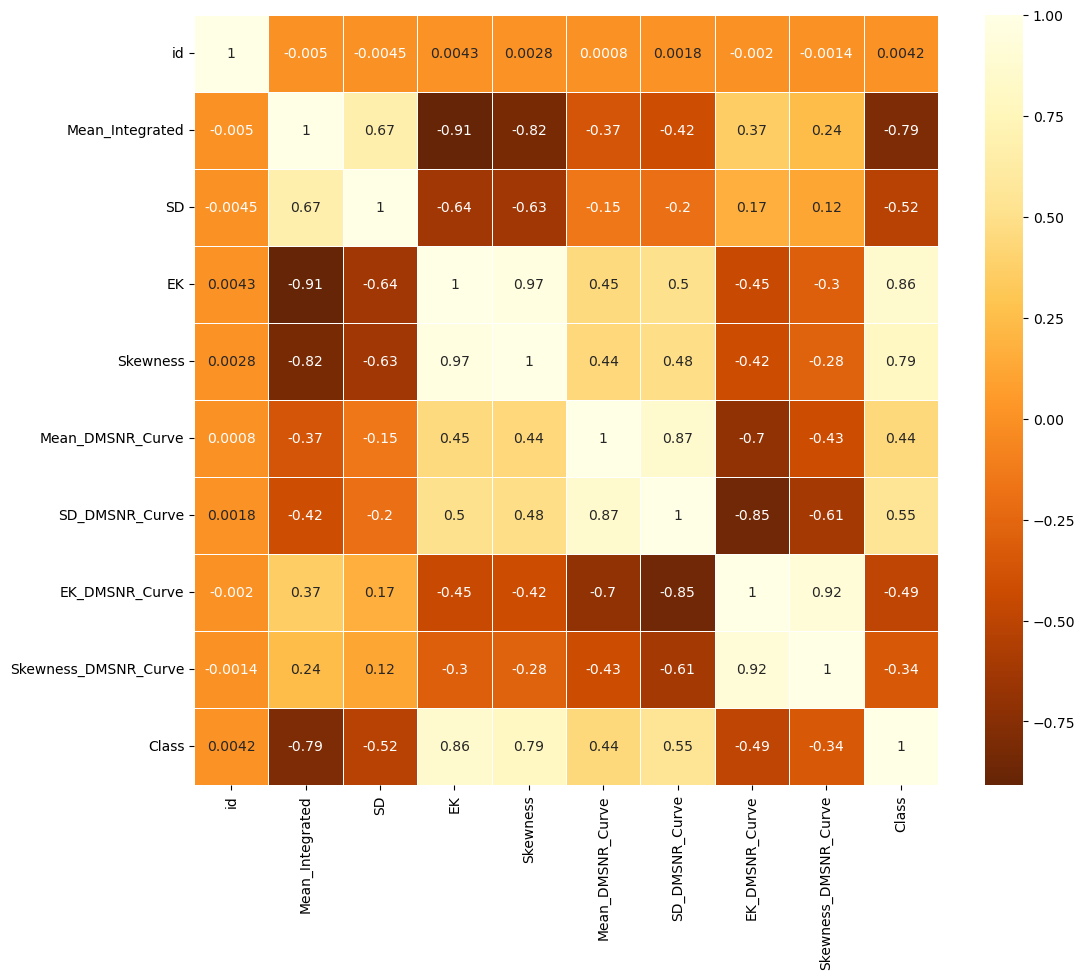

In [8]:
fig, ax = plt.subplots(figsize=(12, 10))
t = sns.heatmap(cors, linewidths=.5, cmap='YlOrBr_r', annot=True)
plt.show()

In [9]:
from sklearn.model_selection import train_test_split, StratifiedKFold

x = df_train.drop(columns=['Class', 'id'],axis=1)
y = df_train['Class']

X_train, X_valid, y_train, y_valid = train_test_split(x.astype('float32'), y.astype('float32'), test_size=0.2,random_state=0)

In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [11]:
X_train.shape

(94051, 8)

In [12]:
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential()
model.add(Dense(60, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(30, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [13]:
es = EarlyStopping(monitor='val_loss', patience=5)

In [14]:
hist = model.fit(X_train, y_train, epochs=30, batch_size=32, verbose=1, callbacks=[es])

Epoch 1/30
2940/2940 [==============================] - 6s 2ms/step - loss: 0.2038 - accuracy: 0.9630
Epoch 2/30
2940/2940 [==============================] - 5s 2ms/step - loss: 0.0635 - accuracy: 0.9848
Epoch 3/30
2940/2940 [==============================] - 5s 2ms/step - loss: 0.0577 - accuracy: 0.9864
Epoch 4/30
2940/2940 [==============================] - 5s 2ms/step - loss: 0.0557 - accuracy: 0.9870
Epoch 5/30
2940/2940 [==============================] - 5s 2ms/step - loss: 0.0529 - accuracy: 0.9877
Epoch 6/30
2940/2940 [==============================] - 5s 2ms/step - loss: 0.0511 - accuracy: 0.9878
Epoch 7/30
2940/2940 [==============================] - 5s 2ms/step - loss: 0.0516 - accuracy: 0.9879
Epoch 8/30
2940/2940 [==============================] - 5s 2ms/step - loss: 0.0507 - accuracy: 0.9879
Epoch 9/30
2940/2940 [==============================] - 5s 2ms/step - loss: 0.0496 - accuracy: 0.9880
Epoch 10/30
2940/2940 [==============================] - 5s 2ms/step - loss: 0.049

Text(0.5, 1.0, 'Loss evolution')

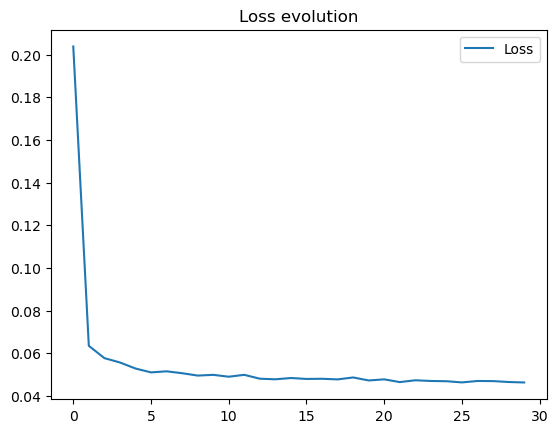

In [15]:
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'], label='Loss')
plt.legend()
plt.title('Loss evolution')

In [16]:
model.evaluate(X_valid, y_valid, verbose=0)

[0.03741677850484848, 0.9902181625366211]

In [17]:
df_sub = pd.read_csv('/kaggle/input/playground-series-s3e10/sample_submission.csv')
df_sub.head()

,id,Class
0,117564,0.5
1,117565,0.5
2,117566,0.5
3,117567,0.5
4,117568,0.5


In [18]:
x_test = df_test.drop('id', axis=1).astype(float)
x_test

,Mean_Integrated,SD,EK,Skewness,Mean_DMSNR_Curve,SD_DMSNR_Curve,EK_DMSNR_Curve,Skewness_DMSNR_Curve
0,140.046875,54.507800,0.058862,-0.567263,2.337793,14.868335,9.591760,117.988781
1,107.828125,51.578965,0.284368,-0.338430,1.574415,12.501437,11.694968,182.704822
2,135.062500,49.812343,-0.087784,-0.094341,3.576923,21.243336,7.252386,59.021499
3,112.812500,41.926647,0.519921,1.287762,6.669732,29.013153,5.097661,27.105240
4,96.210938,35.322620,0.481286,2.443080,2.218227,17.041064,9.766006,117.131775
...,...,...,...,...,...,...,...,...
78372,119.328125,46.449223,0.227636,0.161986,1.120401,13.883072,14.153556,213.485463
78373,125.835938,43.986678,0.078460,0.077917,2.342809,13.008583,9.907167,136.815454
78374,131.789062,43.493074,0.049140,0.402859,2.116221,14.639555,10.898768,147.929016
78375,79.476562,42.579993,0.817383,1.818474,1.903010,15.844982,10.723755,143.273847


In [19]:
preds = model.predict(x_test)
preds

2450/2450 [==============================] - 3s 1ms/step


array([[6.9299830e-07],
       [1.3890886e-04],
       [5.5253568e-06],
       ...,
       [2.5460445e-06],
       [8.5734561e-02],
       [9.6801466e-01]], dtype=float32)

In [20]:
pred_norm = (preds - np.min(preds)) / (np.max(preds) - np.min(preds))
pred_norm

array([[6.9279417e-07],
       [1.3894727e-04],
       [5.5265027e-06],
       ...,
       [2.5463580e-06],
       [8.5758515e-02],
       [9.6828508e-01]], dtype=float32)

In [21]:
df_sub['Class'] = pred_norm
df_sub

,id,Class
0,117564,6.927942e-07
1,117565,1.389473e-04
2,117566,5.526503e-06
3,117567,1.748868e-02
4,117568,1.107660e-02
...,...,...
78372,195936,2.270820e-05
78373,195937,3.489446e-06
78374,195938,2.546358e-06
78375,195939,8.575851e-02


In [22]:
df_sub.to_csv('tensor.csv', index=False)